This is the code for equation y'' - 2xy' - 2y= -4x

Boundary conditions are

y(0) - y'(0) = 0

2y(1) - y'(1) = 1

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 15]

In [55]:
def A(x):
	return -2 * x
def B(x):
	return -2
def C(x):
	return -4 * x

def get_a(x, h):
	return 1/(h**2) - A(x)/(2.0 * h)
def get_b(x, h):
	return - 2/(h**2) + B(x)
def get_c(x, h):
	return 1/(h**2) + A(x)/(2.0 * h)

In [56]:
def ThomasAlgorith(a, b, c, d, n):
    c_dash = np.zeros(n-1)
    d_dash = np.zeros(n-1)
    c_dash[0] = c[0] / b[0]
    d_dash[0] = d[0] / b[0]
    for itr in range(1, n-1):
        c_dash[itr] = c[itr] / (b[itr] - a[itr] * c_dash[itr-1])
        d_dash[itr] = (d[itr] - a[itr]*d_dash[itr-1]) / (b[itr] - a[itr] * c_dash[itr-1])
    
    y = np.zeros(n-1)
    y[n-2] = d_dash[n-2]
    
    for itr in reversed(range(n-2)):
        y[itr] = d_dash[itr] - c_dash[itr] * y[itr+1]
    
    return y

In [57]:
def TridiagonalBVP(x0, xn, h, n):
	x = [(x0 + itr * h) for itr in range(1, n)]
	#print x[n-1]
	a = [get_a(itr, h) for itr in x]
	b = [get_b(itr, h) for itr in x]
	c = [get_c(itr, h) for itr in x]
	d = [C(itr) for itr in x]
	
	b[0] += 4 / (2*h + 3) * a[0]
	c[0] += (-1) / (2*h + 3) * a[0]

	b[n-2] += 4 / (3 - 4*h) * c[n-2]
	a[n-2] += (-1) / (3 - 4*h) * c[n-2]
	d[n-2] += (2*h) / (3 - 4*h) * c[n-2]

	return ThomasAlgorithm(a, b, c, d, n)

def func(x0, xn, h = 0.1):
    return np.arange(x0, xn + h, h)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10
[1.326964649307314, 1.484597919333146, 1.6707998517954028, 1.890597777024302, 2.151432983043616, 2.4639652209185128, 2.843288068328897, 3.310751732947917, 3.896703681260417]
[1.1947689618425343, 1.326964649307314, 1.484597919333146, 1.6707998517954028, 1.890597777024302, 2.151432983043616, 2.4639652209185128, 2.843288068328897, 3.310751732947917, 3.896703681260417]
[1.1947689618425343, 1.326964649307314, 1.484597919333146, 1.6707998517954028, 1.890597777024302, 2.151432983043616, 2.4639652209185128, 2.843288068328897, 3.310751732947917, 3.896703681260417, 4.644639612343751]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
20
[1.0994939134711081, 1.1596525068359989, 1.2252380835856422, 1.296476027155611, 1.3736807778035367, 1.4572637792415544, 1.5477440486383012, 1.6457617528157884, 1.7520952905965193, 1.8676825221400277, 1.9936469579787932, 2.131329932389308, 2.282330049198356, 2

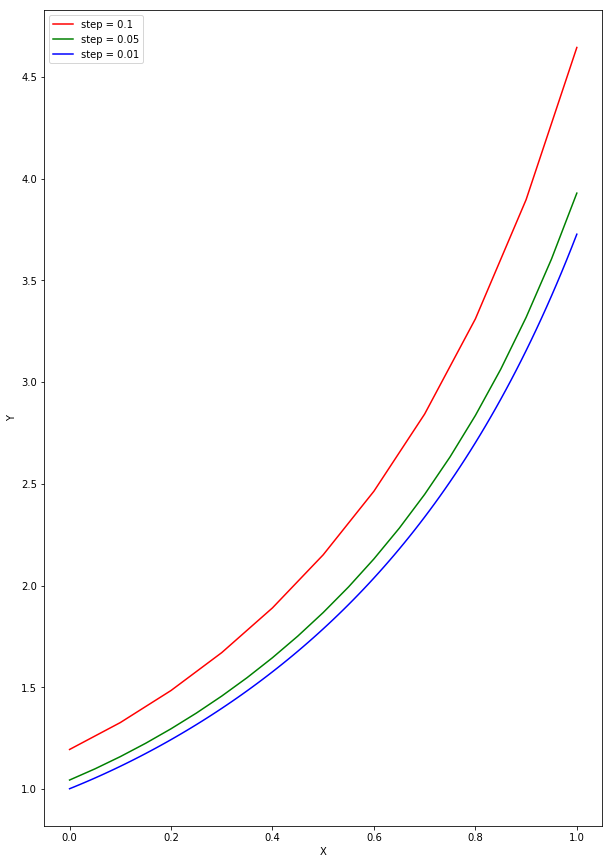

In [58]:
x0 = 0.0
xn = 1.0
steps = [0.1, 0.05, 0.01]
f = lambda xn, x0, step : int(np.ceil((xn-x0)/step))
colors = ['r', 'g', 'b']
labels = ["step = 0.1", "step = 0.05", "step = 0.01"]
# Creating vector that stores the steps
for step in steps:
    y = []
    x_range = func(x0, xn, step)
    print(x_range)
    n = int(np.ceil((xn - x0)/step))
    print(n)
    y[1:n] = TridiagonalBVP(x0, xn, step, n)
    print(y)
    y.insert(0, 4 / (2*step + 3) * y[0] - 1 / (2*step + 3) * y[1])
    print(y)
    y.append((4 * y[n-1] - y[n-2] - 2*step) / (3 - 4*step))
    print(y)
    plt.xlabel('X')
    plt.ylabel('Y')
    i = steps.index(step)
    plt.plot( x_range, y, colors[i], label=labels[i])
    plt.gca().legend(labels)

    